# Project: Investigate a Dataset (Movies Analysis)

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> **Tip**: In this report, we will look into movies data in which we will look further in the below questions.

### 1st what genres as most popular from year to year according to the count of movie produced in that year of each genre
### 2nd Whether there is relationship between Revenue and Budget
### 3rd Whether there is a relationship between the Runtime and Revenue

> **Tip**: For the 1st question, It will be viewed in separate data frame (df_1)
2nd and 3rd questions will be viewed in the original df removing genres column in it
Try to build your report around the analysis of at least one dependent variable and three independent variables.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


In [2]:
# Load the movies data
df = pd.read_csv('tmdb-movies.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [3]:
#Checking duplicates
df[df.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


# Data Cleaning

###  1st dropping duplicates

In [4]:
df.drop_duplicates(inplace = True)
df.duplicated().sum()

0

### 2nd removing unneeded columns

In [5]:
df.drop(['id', 'imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date', 'vote_count', 'vote_average'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   original_title  10865 non-null  object 
 2   runtime         10865 non-null  int64  
 3   genres          10842 non-null  object 
 4   release_year    10865 non-null  int64  
 5   budget_adj      10865 non-null  float64
 6   revenue_adj     10865 non-null  float64
dtypes: float64(3), int64(2), object(2)
memory usage: 679.1+ KB


### 3rd creating df_1 for genres and release year only (to answer the 1st question)

In [6]:
df_1 = df.dropna()
df_1.drop(['popularity', 'original_title', 'runtime', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   genres        10842 non-null  object
 1   release_year  10842 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 254.1+ KB


C:\Users\Alaa\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [7]:
df_1[['value_1', 'value_2', 'value_3', 'value_4', 'value_5']] = df_1['genres'].str.split('|', expand=True)
df_1.drop(['genres'], axis=1, inplace=True)
df_1 = pd.melt(df_1, id_vars=['release_year'], value_name = "genre")
df_1.drop(['variable'], axis=1, inplace=True)
df_1 = df_1.dropna()
df_1['genre'].value_counts()

C:\Users\Alaa\anaconda3\lib\site-packages\pandas\core\frame.py:3065: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


Drama              4760
Comedy             3793
Thriller           2907
Action             2384
Romance            1712
Horror             1637
Adventure          1471
Crime              1354
Family             1231
Science Fiction    1229
Fantasy             916
Mystery             810
Animation           699
Documentary         520
Music               408
History             334
War                 270
Foreign             188
TV Movie            167
Western             165
Name: genre, dtype: int64

In [8]:
df_1.sort_values(by=['release_year'])

,release_year,genre
10124,1960,Horror
10137,1960,Comedy
10138,1960,Action
31802,1960,Thriller
10129,1960,Horror
...,...,...
11431,2015,TV Movie
11429,2015,Drama
11427,2015,Drama
11442,2015,Comedy


### 4th creating removing genres from df (to pinpoint this to answer the 2nd and 3rd questions)

In [9]:
df.drop(['genres'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   popularity      10865 non-null  float64
 1   original_title  10865 non-null  object 
 2   runtime         10865 non-null  int64  
 3   release_year    10865 non-null  int64  
 4   budget_adj      10865 non-null  float64
 5   revenue_adj     10865 non-null  float64
dtypes: float64(3), int64(2), object(1)
memory usage: 594.2+ KB


<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 (what genres as most popular from year to year according to the count of movie produced in that year of each genre)

Text(0, 0.5, 'Genres')

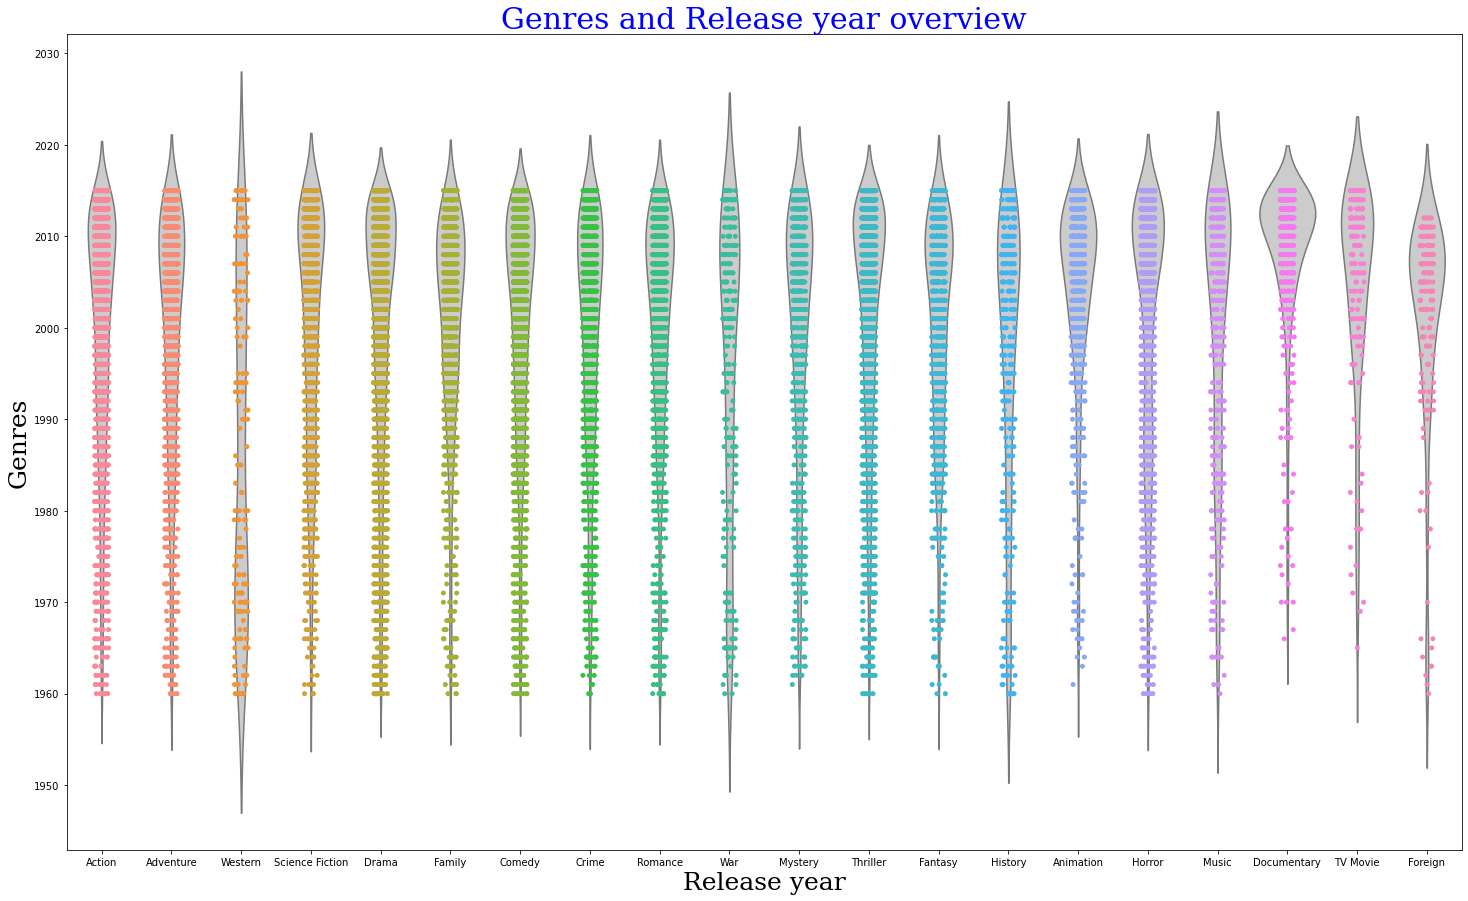

In [35]:
a4_dims = (25, 15)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.violinplot(x= "genre", y="release_year", data=df_1,
                    inner=None, color=".8")
ax = sns.stripplot(x= "genre", y="release_year", data=df_1)

font1 = {'family':'serif','color':'blue','size':30}
font2 = {'family':'serif','size':25}

plt.title("Genres and Release year overview", fontdict = font1)
plt.xlabel("Release year", fontdict = font2)
plt.ylabel("Genres", fontdict = font2)

> **Tip**:In the above graph, we can see that all type of movies has increased except for the western movies which through the years it seems the least popular one 

### Research Question 2  (Whether there is relationship between Revenue and Budget) 

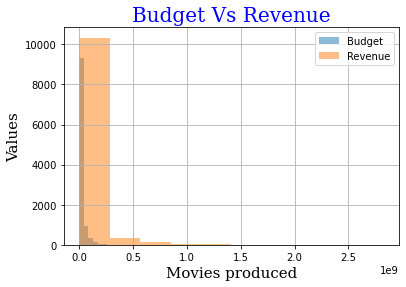

In [42]:
df.budget_adj.hist(alpha =0.5, label = 'Budget')
df.revenue_adj.hist(alpha =0.5, label = 'Revenue')

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','size':15}

plt.title("Budget Vs Revenue", fontdict = font1)
plt.ylabel("Values", fontdict = font2)
plt.xlabel("Movies produced", fontdict = font2)
plt.legend()

Text(0.5, 0, 'Release year')

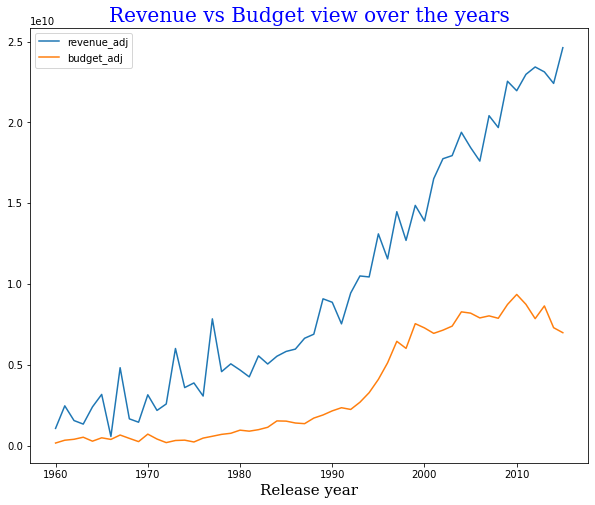

In [41]:
df.groupby(['release_year']).agg({'revenue_adj':'sum','budget_adj':'sum'}).reset_index().plot(x='release_year', figsize=(10,8))

font1 = {'family':'serif','color':'blue','size':20}
font2 = {'family':'serif','size':15}

plt.title("Revenue vs Budget view over the years", fontdict = font1)
plt.xlabel("Release year", fontdict = font2)

> **Tip**: In the above 2 graphs: it shows that Revenue has more effect than budget. As the second graph demonstrate the increase in revenue and budget through the years 

### Research Question 3  (Whether there is a relationship between the Runtime and Revenue)

No handles with labels found to put in legend.


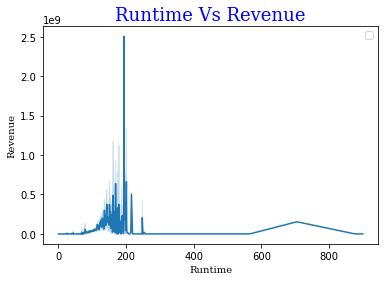

In [45]:
sns.lineplot(x='runtime', y='revenue_adj', data=df)

font1 = {'family':'serif','color':'blue','size':18}
font2 = {'family':'serif','size':10}

plt.title("Runtime Vs Revenue", fontdict = font1)
plt.ylabel("Revenue", fontdict = font2)
plt.xlabel("Runtime", fontdict = font2)
plt.legend()

> **Tip**: There is no relationship between the Revenue the movie has earned with its runtime

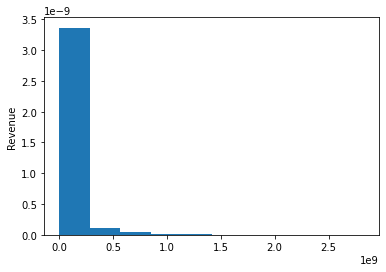

In [23]:
plt.hist( df['revenue_adj'],density = 1) 
plt.xlabel('')
plt.ylabel('Revenue')
plt.show()

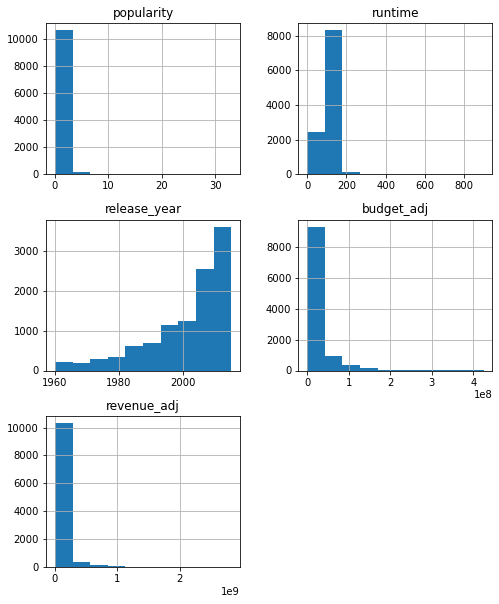

In [19]:
df.hist(figsize=(8,10));

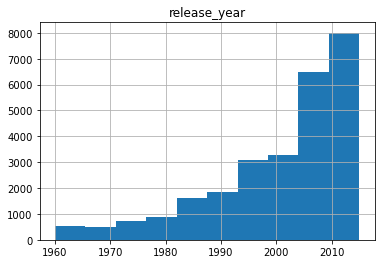

In [22]:
df_1.hist();

<a id='conclusions'></a>
## Conclusions

> **1**: The invest in the movie sector has increase as it shows in the increase in all the genres produced through the years.
> **2**: Producer has increased the budget set for the movie as well as gaining more Revenue.
> **3**: The Revenue of the movie has no relationship with the runtime of the movie.
> **4**: The Number of movies produced has increased since the majority of movies bring high Revenue.



Limitation: 

1. There were 23 missing values in genres which has been neglected in the genres analysis.
2. As for the Revenue and Budget analysis, there are more factors involved like the popularity of actors, and the economic standards which could affect Revenue and Budget limit. 

## Submitting your Project 


In [15]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1